<a href="https://colab.research.google.com/github/chiragmishra03/Mileage-Prediction/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MILEAGE PREDICTION - REGRESSION ANALYSIS**

-------------

## **Objective**

     The Objective Of This Analysis Is To Find The Amount Of Fuel Consumption In Miles Per Gallon. This Is Visualized By The Model Of Polynomial Regression And Linear Regression


## **Data Source**

  The Origin Of This Data Is From The StatLib Library Which Is Maintained At Camegie Mellon University. The Dataset Used In The 1983 American Statistical Association Expositon. In This Program This Data Is Taken From The Github Platfrom From The YBI Foundation. The Data Is A "CSV" File Type.


## **Import Library**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pllt
import seaborn as sns

## **Import Data**

In [25]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

## **Describe Data**

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [27]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [28]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## **Data Visualization**

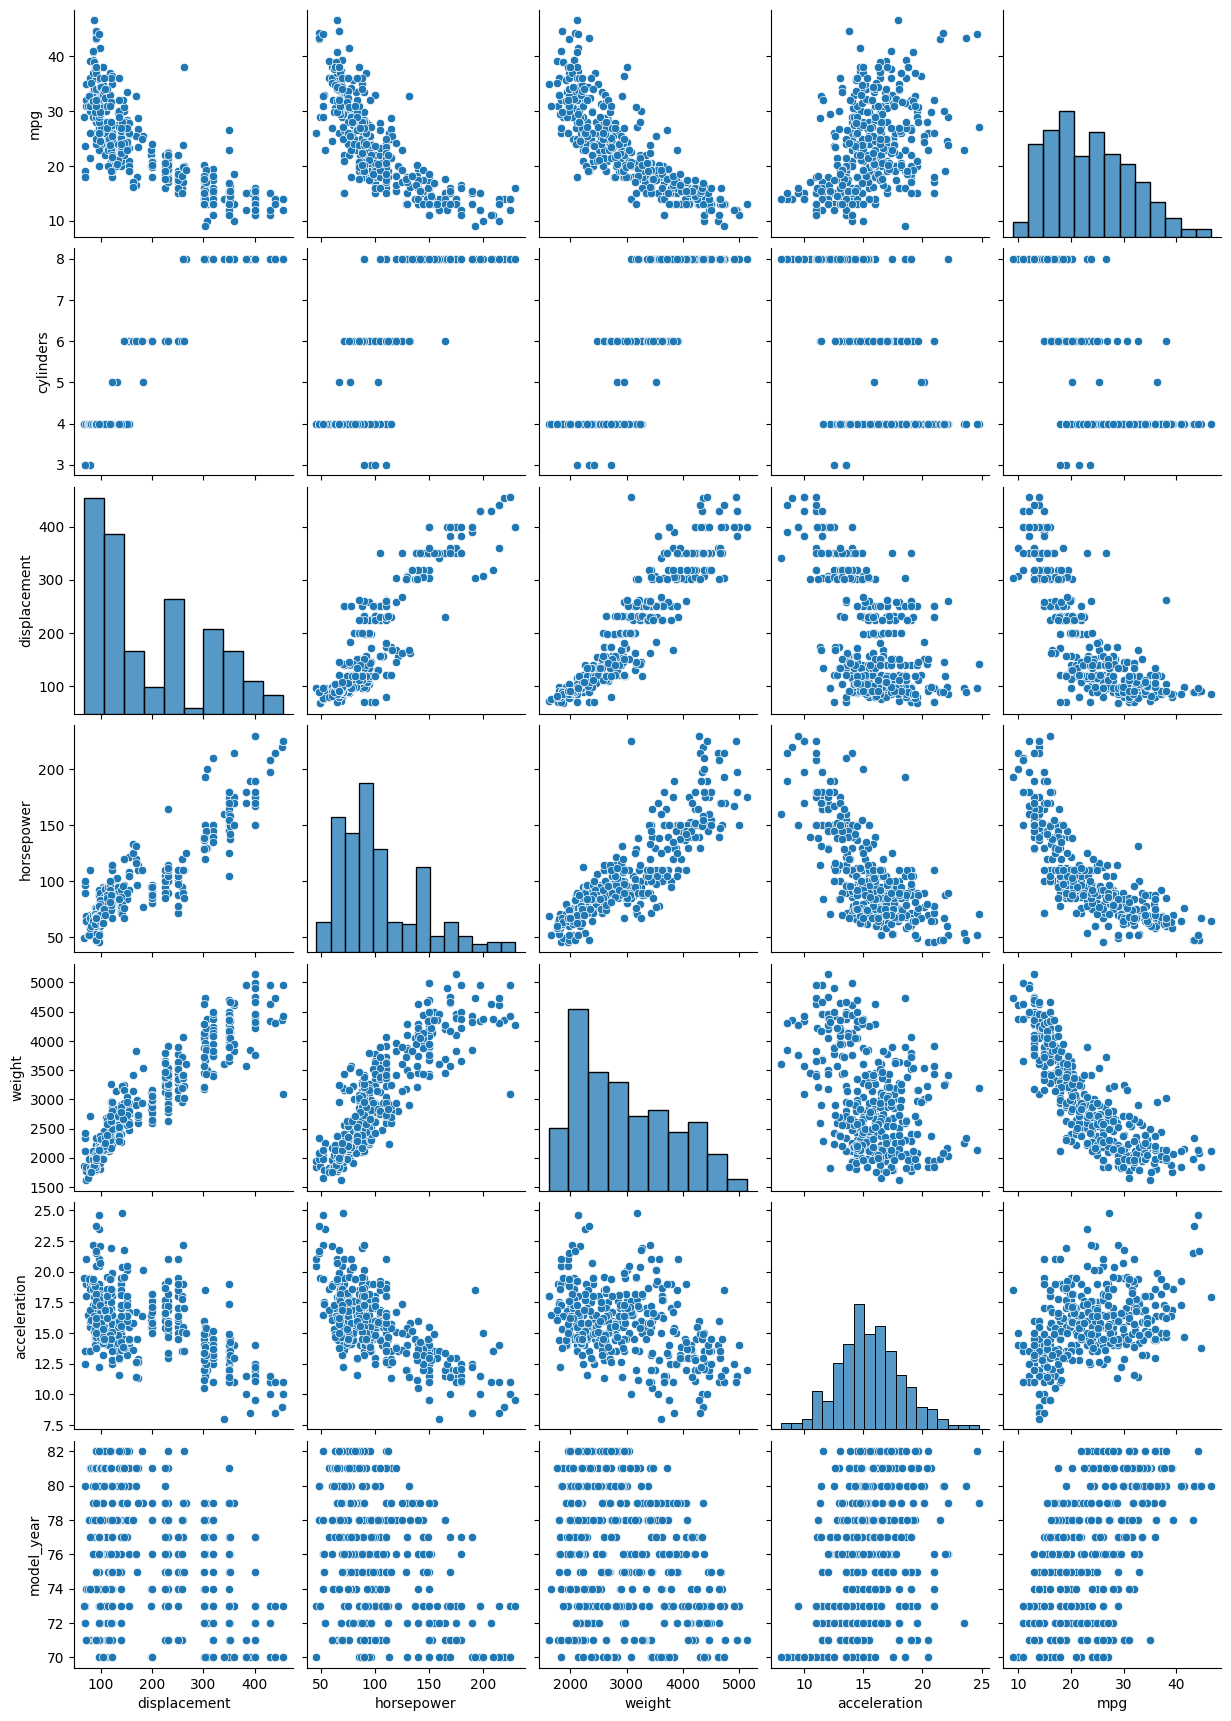

In [29]:
sns.pairplot(df,x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']);

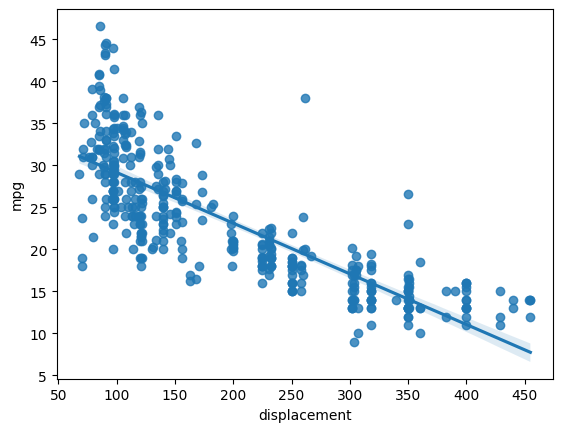

In [30]:
sns.regplot(x='displacement',y='mpg',data=df);

## **Data Preprocessing**

In [31]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [32]:
df=df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Define Target Variable (y) and Feature Variables (X)**

In [34]:
df.columns
y=df['mpg']
y.shape
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]
X.shape

(392, 4)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
X=ss.fit_transform(X)

In [38]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [39]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## **Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

## **Model Evaluation**

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
model.intercept_

23.485738559737584

In [47]:
model.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [50]:
X_train2=poly.fit_transform(X_train)

In [51]:
X_test2=poly.fit_transform(X_test)

In [52]:
model.fit(X_train2,y_train)

LinearRegression()

In [53]:
model.intercept_

21.27336450063766

In [54]:
model.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [55]:
y_pred_poly=model.predict(X_test2)

## **Prediction**

In [56]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [57]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [58]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938687

In [59]:
r2_score(y_test,y_pred_poly)

0.7461731314563803

## **Explaination**

      In This Program Mileage Is Taken As Main Objective. Here A csv File Of MPG Is Used As A Data Source To Train And Predict The Model. Initially , Libraries Are Imported (Pandas,Numpy) , Secondly , A csv File Of MPG Is Imported. In Step 3 , Data Preprocessing Were Done. In Step 4 , Dependent Variable And Independent Variables Were Defined. In Step 5 , From The Variables The Datum Were Splited As Train And Test From The Library Using "sklearn". In Step 6 , From The Datum The Data Is Visualized. In Step 7 , The Model Is Selected And The Model Is Trained With The Train Datum. In Step 8 , The Model Is Used To Predict From The Test Datum. In Step 9 , The Model Is Evaluated.
